<a href="https://colab.research.google.com/github/RahulBari07/Deep-Learning/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#step-1 Read the dataset

In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df=pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Step-2 Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
df.duplicated().sum()

41

In [9]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [11]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


Seperate X and Y (PE)

In [13]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [14]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [15]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Step 4: Preprocess X using pipeline

In [16]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [17]:
from sklearn.pipeline import Pipeline
from  sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [20]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
            ('scale',StandardScaler())]).set_output(transform='pandas')

In [21]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


Apply Train Test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [23]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [24]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [25]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [26]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [27]:
xtrain.shape

(7621, 4)

In [28]:
xtest.shape

(1906, 4)

In [30]:
xtrain.shape[1]

4

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Input



In [38]:
#Intialize the model
model = Sequential()

#Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

#Add Dense Hodden Layer 1
model.add(Dense(16,activation='relu'))

#Add Hidden Layer 2
model.add(Dense(8,activation='relu'))

#Add output Layer
model.add(Dense(1,activation='linear'))

In [39]:
#Compile the model
model.compile(loss="mse",metrics=["mae"],optimizer="adam")

In [40]:
hist = model.fit(xtrain,ytrain,
                 validation_data=(xtest,ytest),
                 epochs=60)


Epoch 1/60
239/239 [==============================] - 4s 4ms/step - loss: 204977.8125 - mae: 452.4140 - val_loss: 200857.7344 - val_mae: 447.7762
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 181542.9531 - mae: 424.5350 - val_loss: 149290.0938 - val_mae: 382.9557
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 107570.7578 - mae: 312.1957 - val_loss: 67669.5938 - val_mae: 235.8226
Epoch 4/60
239/239 [==============================] - 1s 3ms/step - loss: 43861.5000 - mae: 186.8207 - val_loss: 23129.0977 - val_mae: 134.5107
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 15578.0166 - mae: 108.0954 - val_loss: 10174.0684 - val_mae: 85.9101
Epoch 6/60
239/239 [==============================] - 1s 3ms/step - loss: 8888.8320 - mae: 79.7708 - val_loss: 7076.6426 - val_mae: 71.0314
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 6237.4341 - mae: 66.3697 - val_loss: 4973.4897 - val_mae: 59.2

In [41]:
hist.history["loss"]


[204977.8125,
 181542.953125,
 107570.7578125,
 43861.5,
 15578.0166015625,
 8888.83203125,
 6237.43408203125,
 4331.50244140625,
 2961.68017578125,
 2030.575927734375,
 1421.0191650390625,
 1036.2296142578125,
 781.4974975585938,
 595.6834106445312,
 456.1429748535156,
 352.3826904296875,
 274.0699768066406,
 214.82000732421875,
 169.30670166015625,
 133.93911743164062,
 107.23651885986328,
 86.419189453125,
 70.34326171875,
 57.90016555786133,
 48.53347396850586,
 41.3233528137207,
 35.870277404785156,
 31.77001953125,
 28.632104873657227,
 26.365976333618164,
 24.661773681640625,
 23.486732482910156,
 22.74488067626953,
 22.092721939086914,
 21.636856079101562,
 21.321739196777344,
 21.133134841918945,
 20.923757553100586,
 20.804861068725586,
 20.71644401550293,
 20.596784591674805,
 20.613014221191406,
 20.553407669067383,
 20.35633659362793,
 20.454029083251953,
 20.355600357055664,
 20.17825698852539,
 20.292186737060547,
 20.203157424926758,
 20.274932861328125,
 19.97212219238

In [42]:
hist.history['val_loss']

[200857.734375,
 149290.09375,
 67669.59375,
 23129.09765625,
 10174.068359375,
 7076.642578125,
 4973.48974609375,
 3411.750244140625,
 2325.814453125,
 1600.447998046875,
 1138.4151611328125,
 853.4620971679688,
 647.5646362304688,
 502.0782165527344,
 383.88739013671875,
 299.30889892578125,
 237.22589111328125,
 187.07623291015625,
 148.51495361328125,
 119.19631958007812,
 95.1003646850586,
 78.17505645751953,
 63.78608703613281,
 53.478572845458984,
 45.72857666015625,
 39.4683952331543,
 34.45125961303711,
 31.094911575317383,
 28.41064453125,
 26.35393714904785,
 25.012203216552734,
 24.591060638427734,
 23.348251342773438,
 23.40894889831543,
 22.943260192871094,
 22.02115821838379,
 22.13812828063965,
 22.02155876159668,
 21.990476608276367,
 20.90724754333496,
 20.71383285522461,
 21.147687911987305,
 21.35917091369629,
 21.073528289794922,
 20.84540557861328,
 20.311508178710938,
 20.364913940429688,
 20.779489517211914,
 21.696208953857422,
 20.70836067199707,
 19.88247871

AttributeError: module 'matplotlib.pyplot' has no attribute 'tittle'

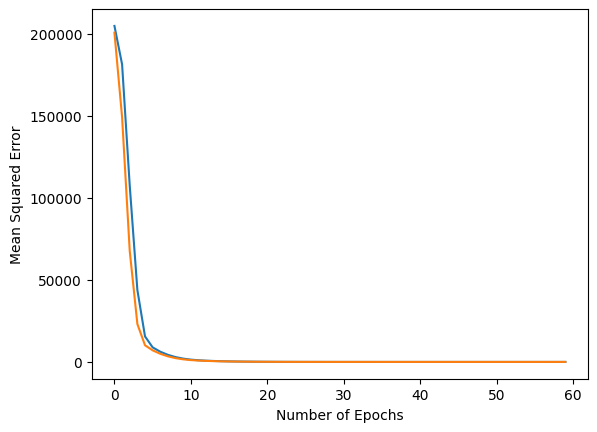

In [44]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.tittle("Learning Curve")
plt.legend()
plt.show()

In [45]:
model.evaluate(xtrain,ytrain)

239/239 [==============================] - 1s 3ms/step - loss: 20.8175 - mae: 3.5617


[20.81753158569336, 3.5616564750671387]

In [46]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 5ms/step - loss: 20.9086 - mae: 3.5807


[20.908613204956055, 3.580742120742798]


Predict the results for train and test

In [47]:
ypred_train = model.predict(xtrain)
ypred_test =  model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [48]:
ypred_train[0:5]

array([[449.36285],
       [477.18497],
       [467.1475 ],
       [430.3533 ],
       [465.1794 ]], dtype=float32)

In [49]:
ytrain.head()


,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [50]:
ypred_test[0:5]

array([[429.87833],
       [480.87778],
       [482.7142 ],
       [448.5673 ],
       [444.98752]], dtype=float32)

In [51]:
ytest.head()


,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [53]:
#R2 Score in train
from sklearn.metrics import r2_score
r2_score(ytrain,ypred_train)

0.9275723030423473

In [54]:
#R2 sore in test
r2_score(ytest,ypred_test)

0.9307179410801869

####r2 score > 0.8 for both train and test i can use above model for out of sample prediction


In [55]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()


,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [56]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [58]:
Pipeline(steps=[('impute',SimpleImputer()),('scale',StandardScaler())])

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [59]:
xnew_pre =num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [60]:
preds=model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 3ms/step


array([[443.48337],
       [438.27835],
       [429.79395],
       [438.1586 ],
       [473.22897]], dtype=float32)

In [61]:
xnew["PowerOutput_pred"]=preds


In [63]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,443.483368
1,28.88,54.89,1007.16,46.60,438.278351
2,27.89,73.21,1001.32,85.88,429.793945
3,25.69,62.26,1011.38,74.08,438.158600
4,12.16,40.81,1025.79,70.97,473.228973
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,435.087891
96,11.78,39.96,1011.37,82.95,470.862457
97,5.62,41.38,1020.91,86.21,483.036041
98,24.96,74.99,1008.25,80.52,434.508575


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

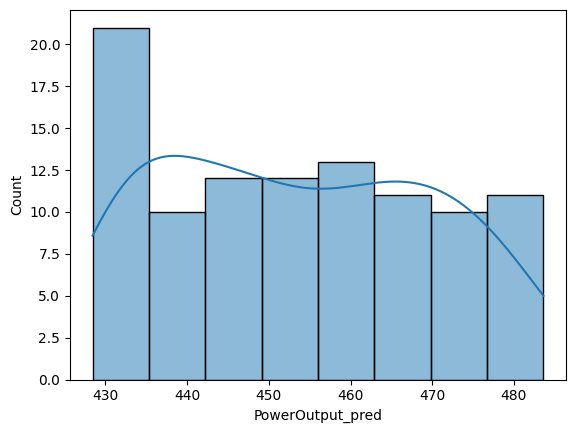

In [67]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred",kde=True)

In [68]:
xnew.to_csv("Results.csv",index=False)